In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.

In [2]:
model = joblib.load("model.pkl")

/Users/markgazol/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearRegression from version 0.22.2.post1 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv") 
negatives = test[test['Predicted']<=0]
positives = test[test['Predicted']>0]


In [4]:
negatives.describe()

,Actual,Predicted,Diviation,year,mileage,engine size,model_ A2,model_ A3,model_ A4,model_ A5,...,fuel type_47,fuel type_48,fuel type_6,fuel type_7,fuel type_8,fuel type_9,fuel type_Diesel,fuel type_Hybrid,fuel type_Other,fuel type_Petrol
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.0,67.000000,67.000000,67.000000,...,67.0,67.0,67.0,67.0,67.0,67.0,67.000000,67.0,67.0,67.000000
mean,3788.656716,-6048.516716,9837.173433,2007.059701,96520.716418,1.825255,0.0,0.208955,0.074627,0.014925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.283582,0.0,0.0,0.268657
std,1852.279599,5372.331507,5082.056241,3.609250,27450.503056,0.480253,0.0,0.409631,0.264772,0.122169,...,0.0,0.0,0.0,0.0,0.0,0.0,0.454138,0.0,0.0,0.446606
min,650.000000,-32042.140000,3563.390000,1991.000000,28477.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,2395.000000,-8113.210000,6344.625000,2005.000000,83754.500000,1.600000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,3495.000000,-4455.700000,9050.360000,2007.000000,97498.000000,1.800000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
75%,4995.000000,-2388.005000,11739.040000,2009.000000,110730.500000,2.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000
max,9395.000000,-68.390000,36492.140000,2013.000000,170000.000000,4.200000,0.0,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000


In [5]:
positives.describe()

,Actual,Predicted,Diviation,year,mileage,engine size,model_ A2,model_ A3,model_ A4,model_ A5,...,fuel type_47,fuel type_48,fuel type_6,fuel type_7,fuel type_8,fuel type_9,fuel type_Diesel,fuel type_Hybrid,fuel type_Other,fuel type_Petrol
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.0,6574.000000,6574.000000,6574.000000,...,6574.000000,6574.000000,6574.0,6574.0,6574.000000,6574.000000,6574.000000,6574.000000,6574.0,6574.000000
mean,20750.933526,20795.773289,-44.839763,2017.276463,22799.716802,1.794609,0.0,0.089139,0.069364,0.042896,...,0.000152,0.000152,0.0,0.0,0.000304,0.000152,0.420444,0.004868,0.0,0.449042
std,10752.488106,9545.802477,3798.277181,1.933364,21151.500945,0.603417,0.0,0.284966,0.254092,0.202639,...,0.012333,0.012333,0.0,0.0,0.017441,0.012333,0.493668,0.069604,0.0,0.497434
min,1675.000000,42.030000,-31874.090000,2003.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,13515.500000,14304.730000,-1941.630000,2016.000000,6348.250000,1.499000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,18300.000000,19651.160000,-403.330000,2017.000000,16030.500000,2.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,25736.750000,26340.930000,1317.465000,2019.000000,33000.000000,2.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,137995.000000,104401.480000,45203.140000,2020.000000,150000.000000,6.200000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [6]:
zeros = negatives.sum()[negatives.sum()==0].index.tolist()

In [7]:
cols = train.columns.tolist()[:-1]

In [8]:
idx = [cols.index(x) for x in cols if x not in zeros]

In [9]:
len(idx)

27

In [10]:
cols_nonz = np.array(cols)[idx]

In [11]:
positives[cols_nonz].describe()

,year,mileage,engine size,model_ A3,model_ A4,model_ A5,model_ A6,model_ A8,model_ C Class,model_ Focus,...,fuel type_15,fuel type_17,fuel type_21,fuel type_22,fuel type_25,fuel type_26,fuel type_30,fuel type_31,fuel type_Diesel,fuel type_Petrol
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,...,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000
mean,2017.276463,22799.716802,1.794609,0.089139,0.069364,0.042896,0.041071,0.006389,0.190904,0.279282,...,0.006997,0.000152,0.000304,0.001521,0.002890,0.008518,0.003499,0.013690,0.420444,0.449042
std,1.933364,21151.500945,0.603417,0.284966,0.254092,0.202639,0.198469,0.079680,0.393043,0.448681,...,0.083363,0.012333,0.017441,0.038975,0.053687,0.091908,0.059050,0.116211,0.493668,0.497434
min,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,6348.250000,1.499000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,16030.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,33000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2020.000000,150000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
negatives[cols_nonz].describe()

,year,mileage,engine size,model_ A3,model_ A4,model_ A5,model_ A6,model_ A8,model_ C Class,model_ Focus,...,fuel type_15,fuel type_17,fuel type_21,fuel type_22,fuel type_25,fuel type_26,fuel type_30,fuel type_31,fuel type_Diesel,fuel type_Petrol
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,2007.059701,96520.716418,1.825255,0.208955,0.074627,0.014925,0.044776,0.014925,0.149254,0.417910,...,0.104478,0.014925,0.029851,0.014925,0.014925,0.044776,0.029851,0.044776,0.283582,0.268657
std,3.609250,27450.503056,0.480253,0.409631,0.264772,0.122169,0.208373,0.122169,0.359028,0.496938,...,0.308188,0.122169,0.171460,0.122169,0.122169,0.208373,0.171460,0.208373,0.454138,0.446606
min,1991.000000,28477.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,83754.500000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,97498.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,110730.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2013.000000,170000.000000,4.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
pd.set_option('float_format', '{:f}'.format)

In [15]:
idx=np.argwhere(model.coef_<=0).ravel()

In [28]:
def plot_rel(feat):
    n_count = negatives[feat].value_counts(normalize=True).reset_index().sort_values("index")
    p_count = positives[feat].value_counts(normalize=True).reset_index().sort_values("index")

    n_count["index"] = n_count["index"].astype(str)
    p_count["index"] = p_count["index"].astype(str)


    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.bar(n_count.iloc[:,0], n_count.iloc[:,1])
    plt.xlabel("negatives")
    plt.ylabel("fraction")
    plt.ylim([0,1])
    plt.subplot(1,2,2)
    plt.bar(p_count.iloc[:,0], p_count.iloc[:,1])
    plt.xlabel("positives")
    plt.ylabel("fraction")
    plt.ylim([0,1])
    plt.suptitle(feat)
    plt.show()

## Analysis approach

In [ ]:
## Analysis approach
## I took the features from the model, which have negative impact on predicitons (coef_<0) and tried to understand
## the difference of the destributions of feature values between the negatives and positives.

## In case of dummy variables, the fraction of 1's in negatives are higher than the ones in positives.
## In case of mileage the distribution of values in negatives are higher (more to the right) than that of negatives.

## From the plotes bellow conclusions might be drawn for each type of the variable. 

## Same could be done for the features with coef_>0 and find the difference in distribution of values for negatives and positives.   

## 1

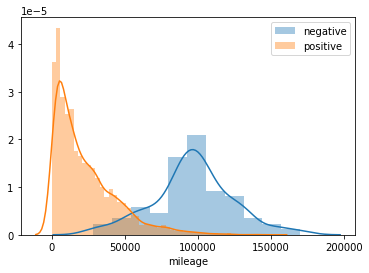

In [32]:
sns.distplot(negatives.mileage)
sns.distplot(positives.mileage)
plt.legend(["negative","positive"]);

## 2

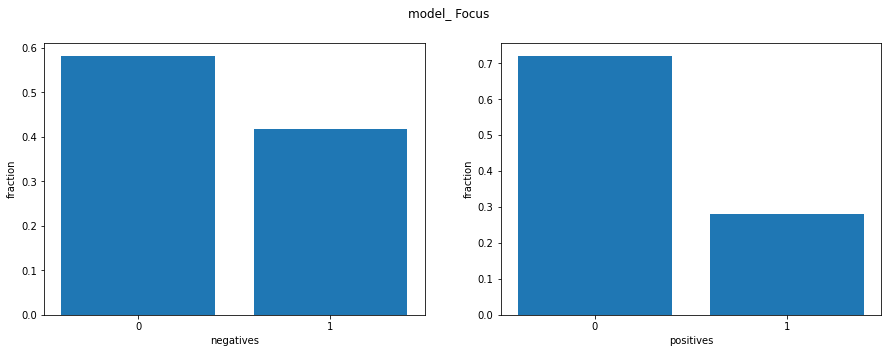

In [183]:
plot_rel("model_ Focus")

## 3

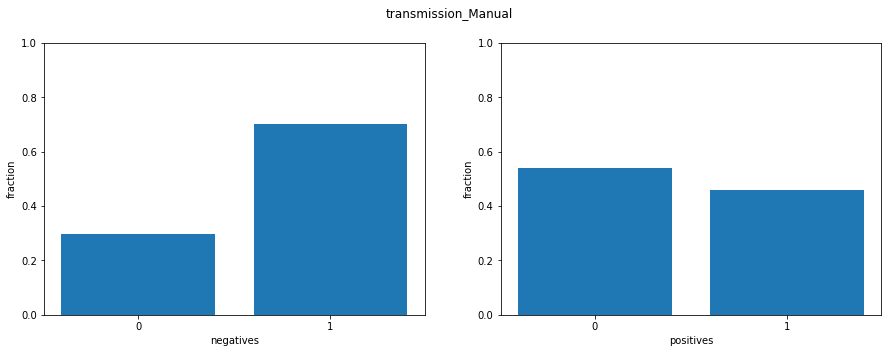

In [31]:
plot_rel("transmission_Manual")

## all other features

In [37]:
negatives.shape

(67, 79)

In [41]:
i

'fuel type_Petrol'

In [43]:
negatives[i].nunique()

2

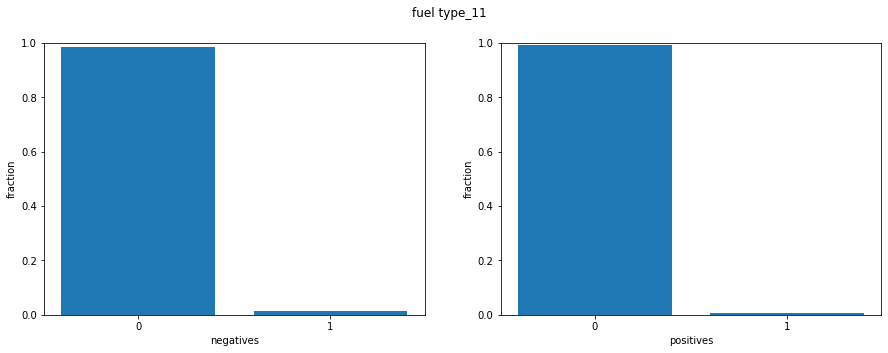

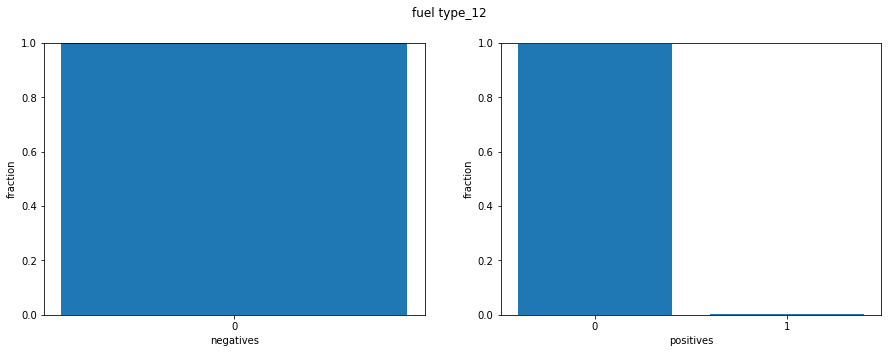

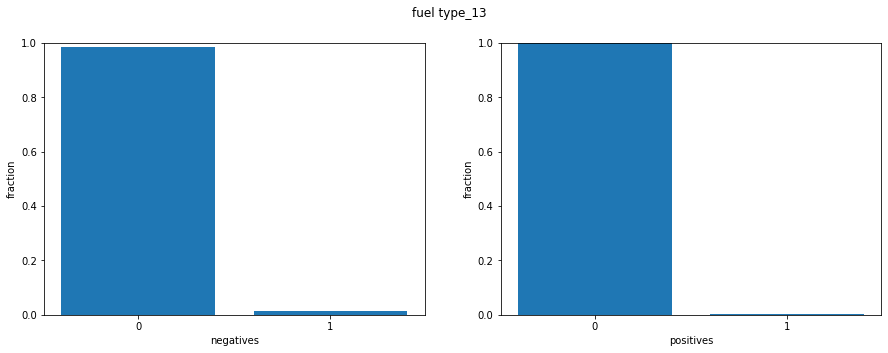

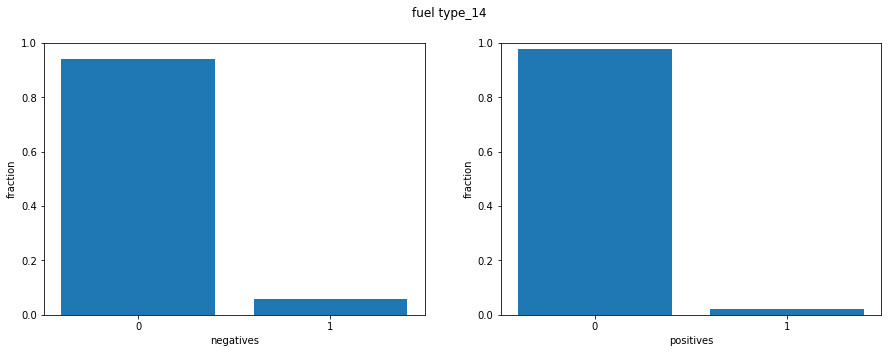

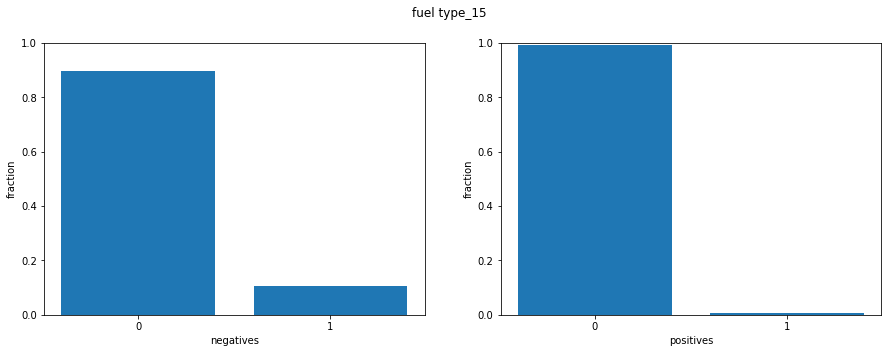

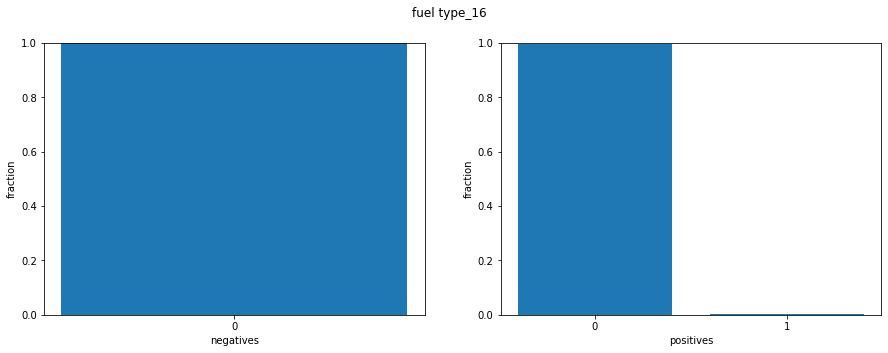

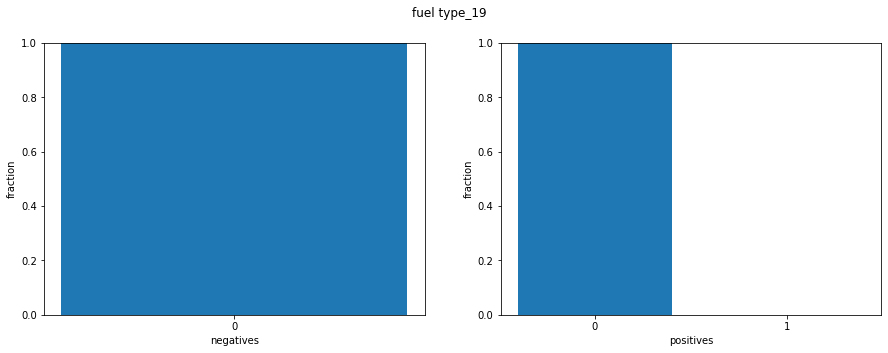

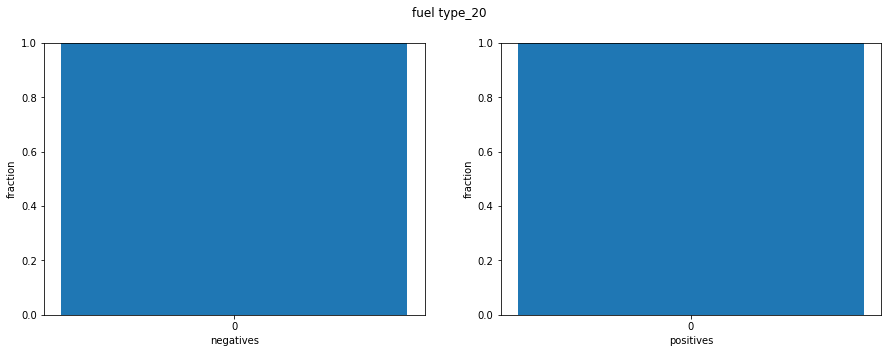

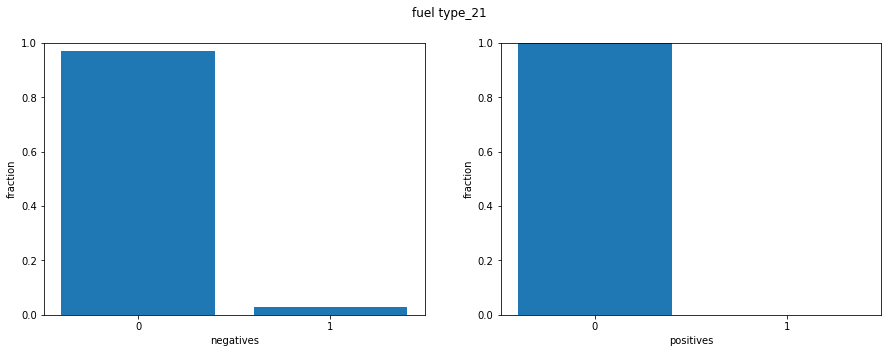

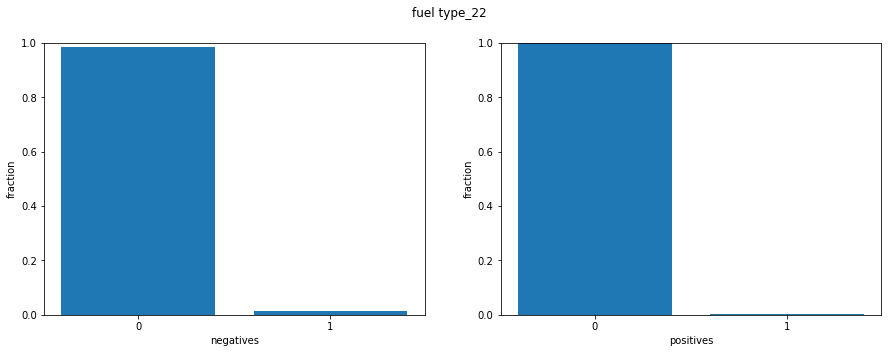

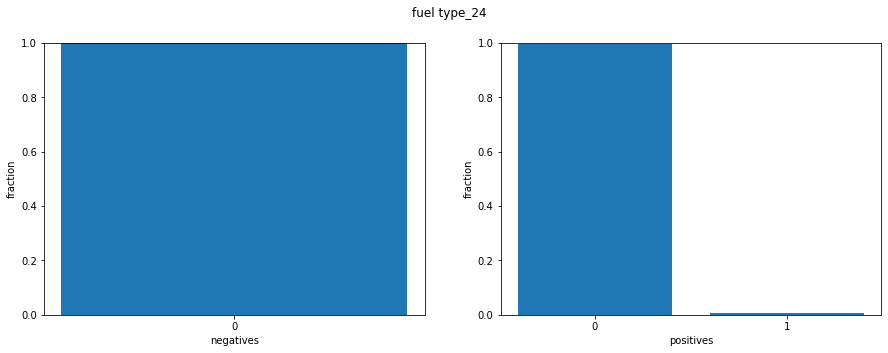

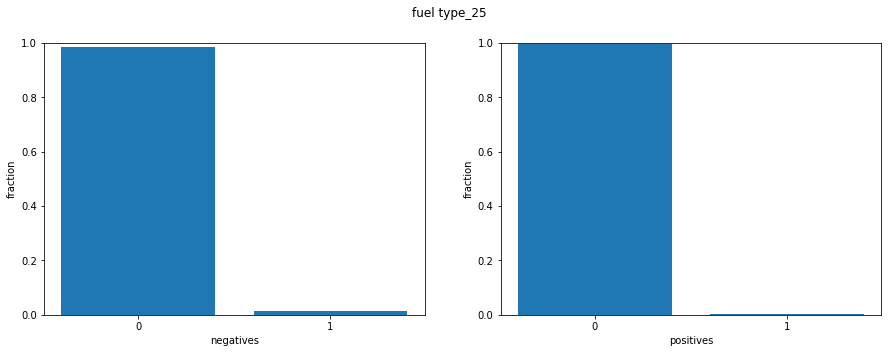

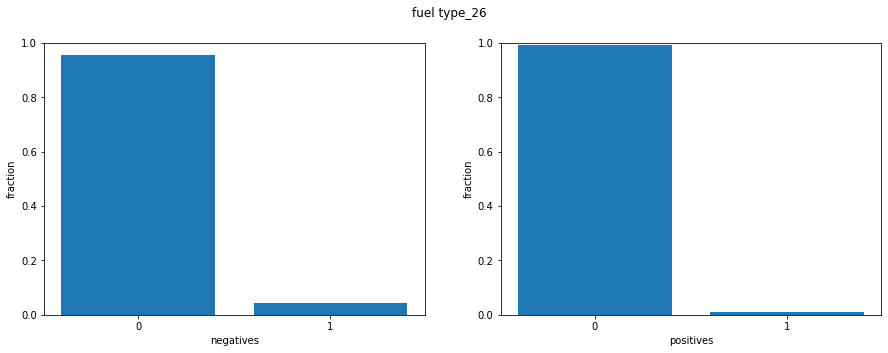

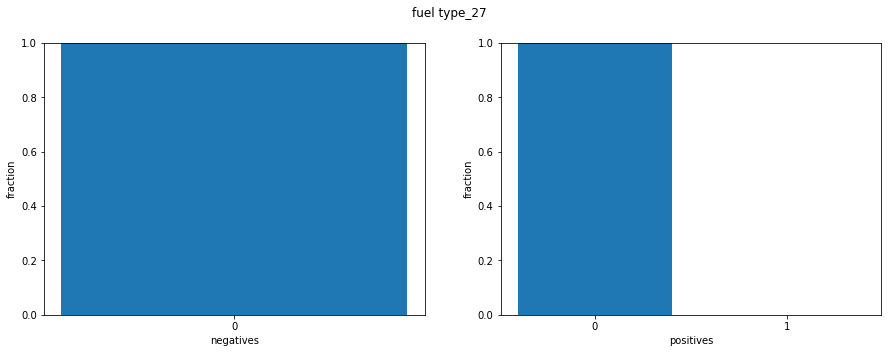

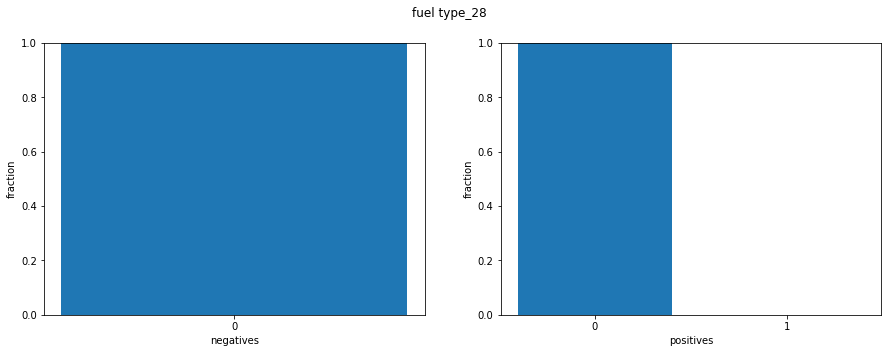

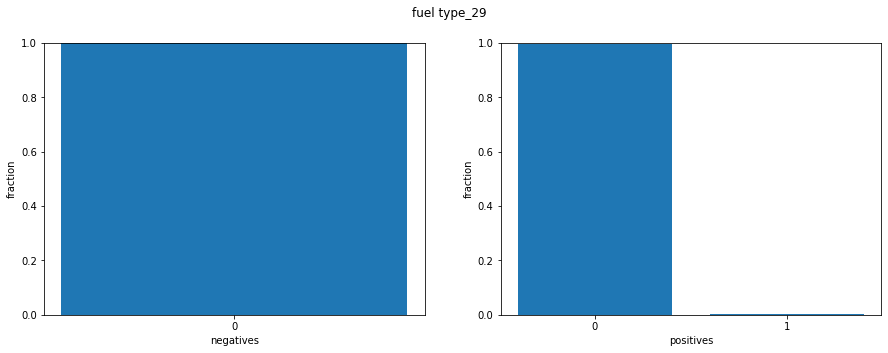

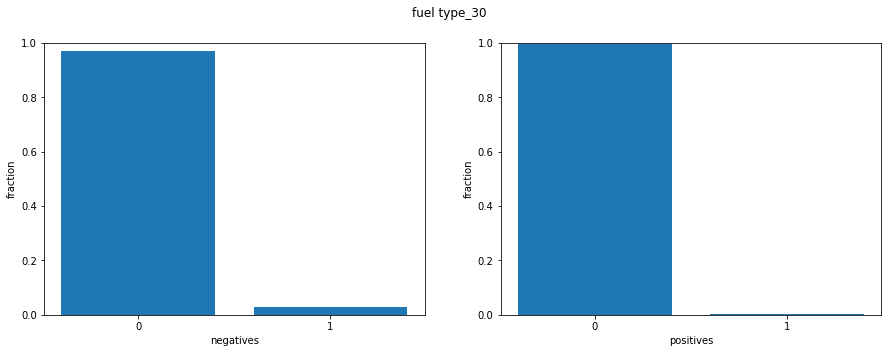

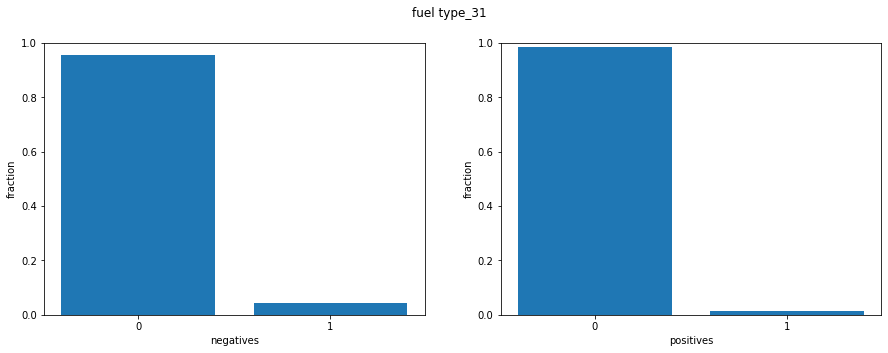

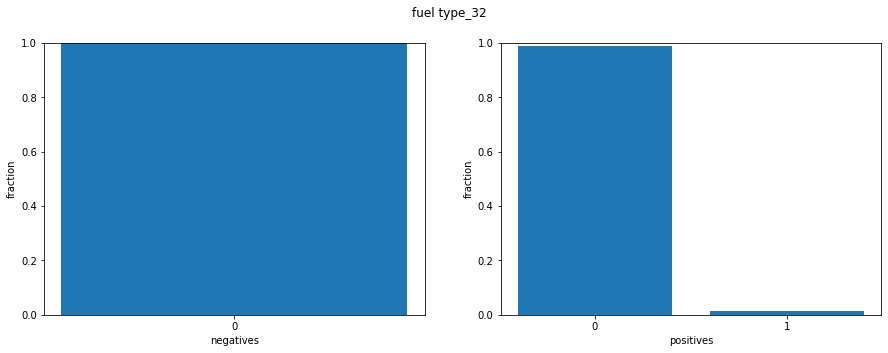

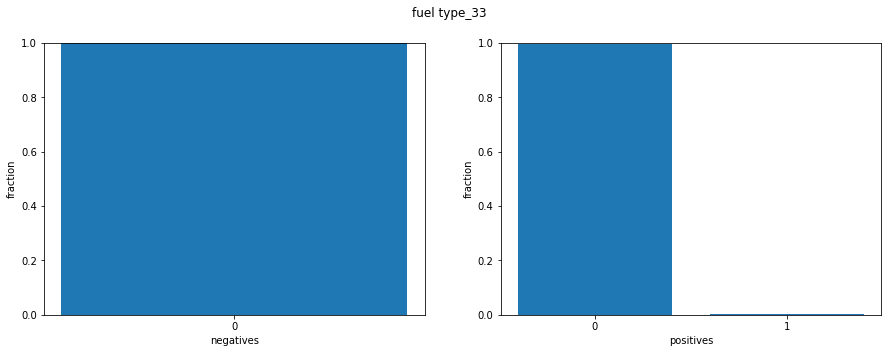

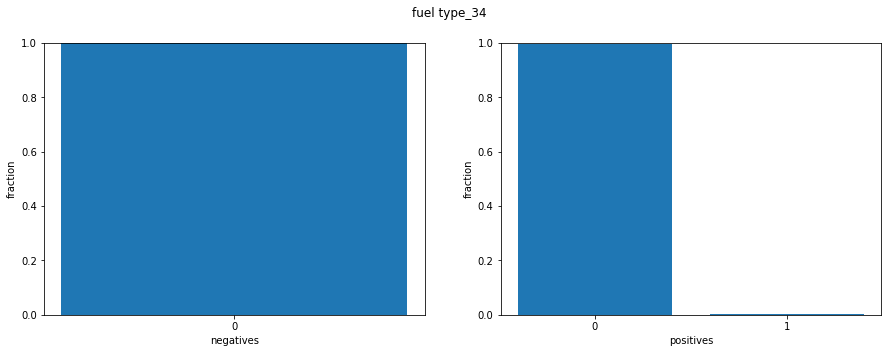

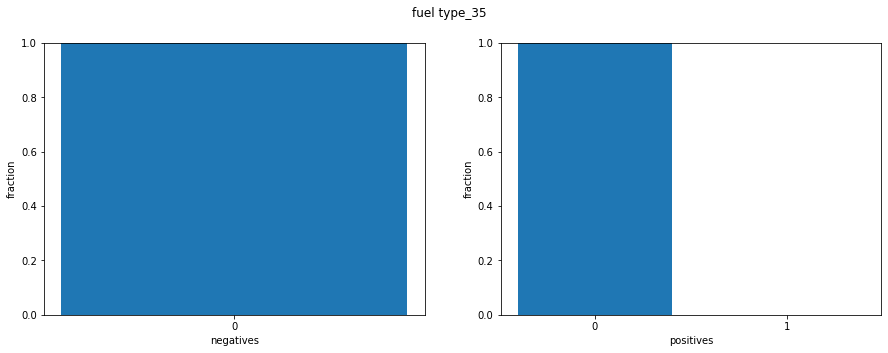

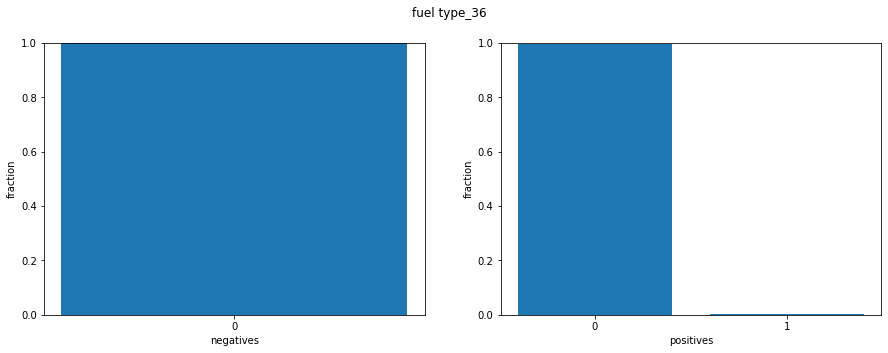

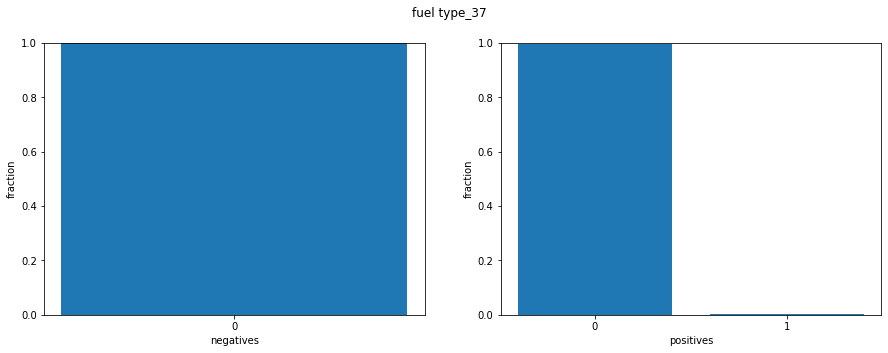

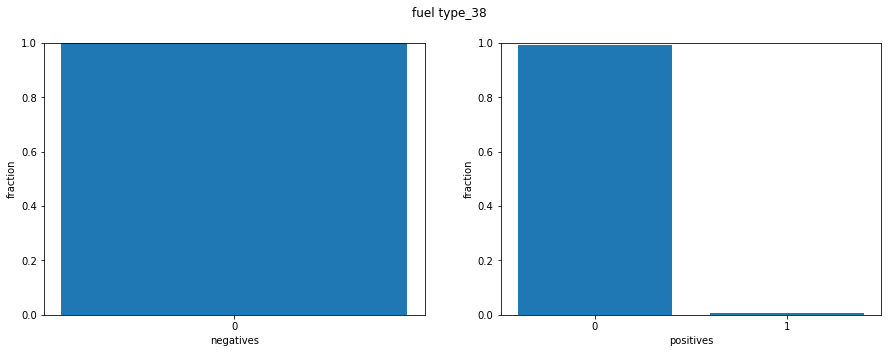

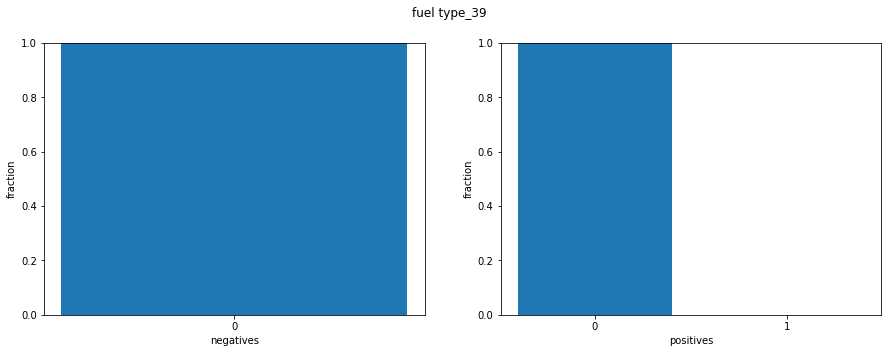

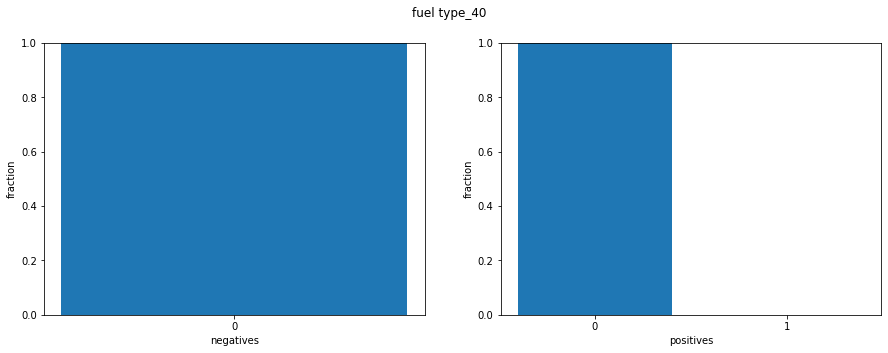

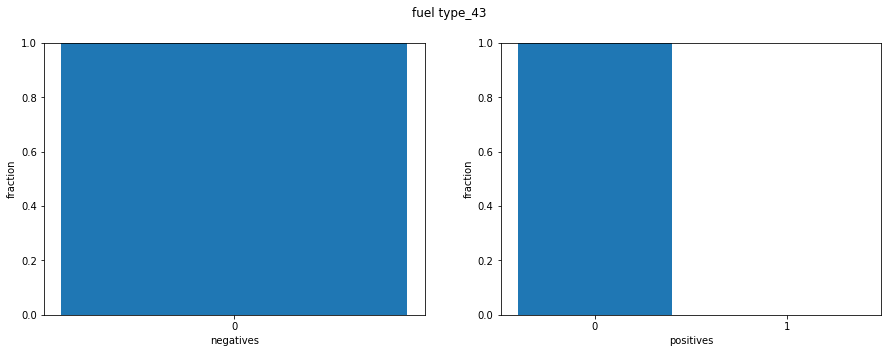

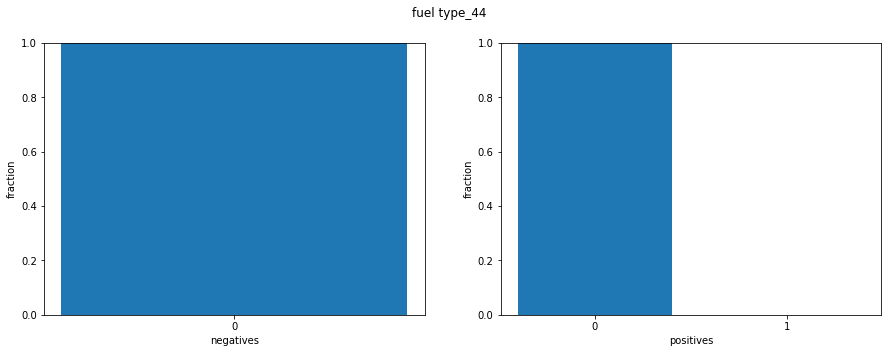

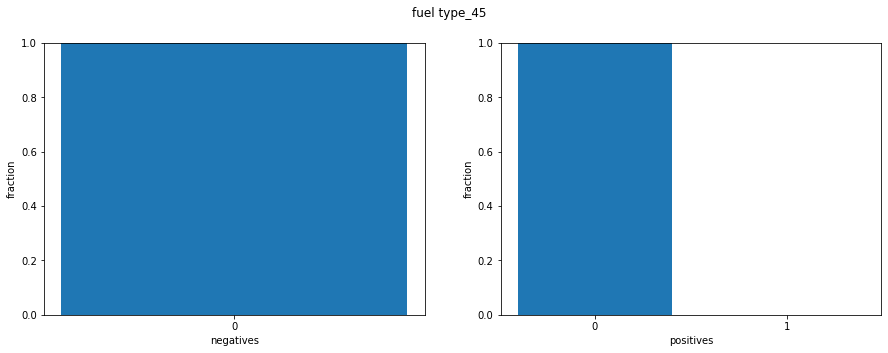

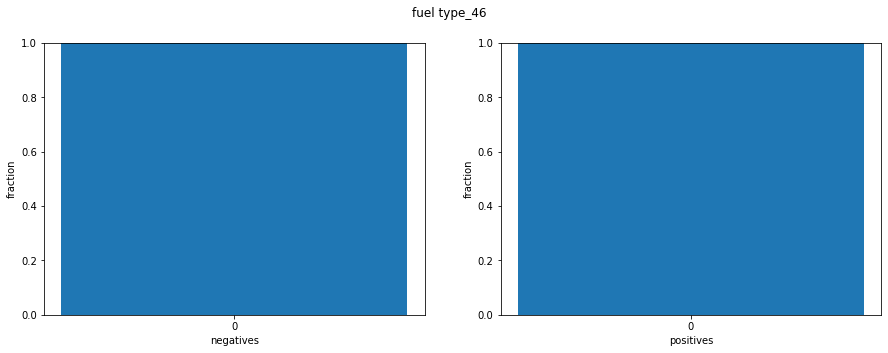

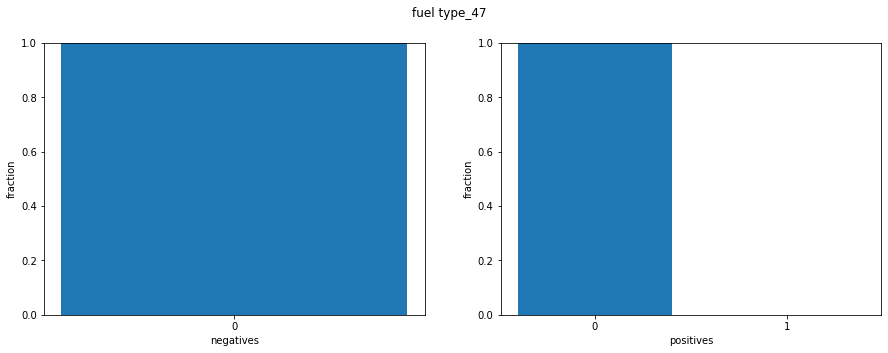

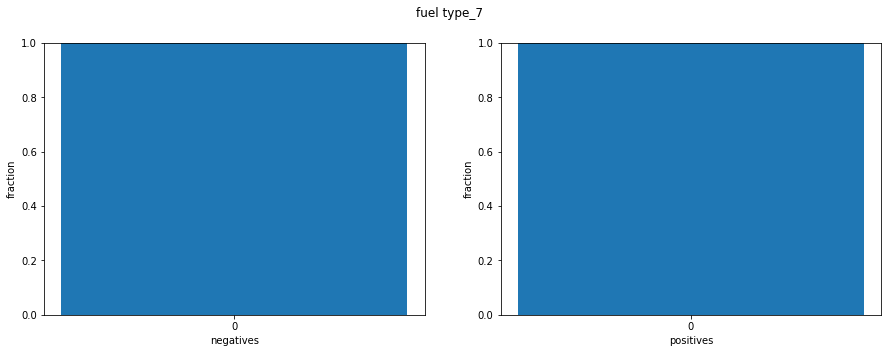

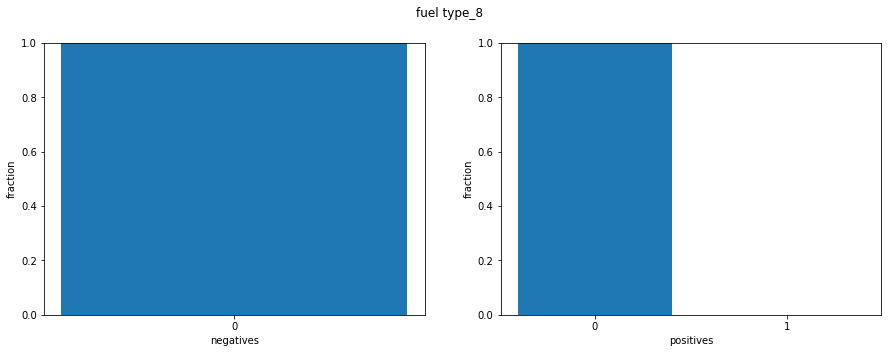

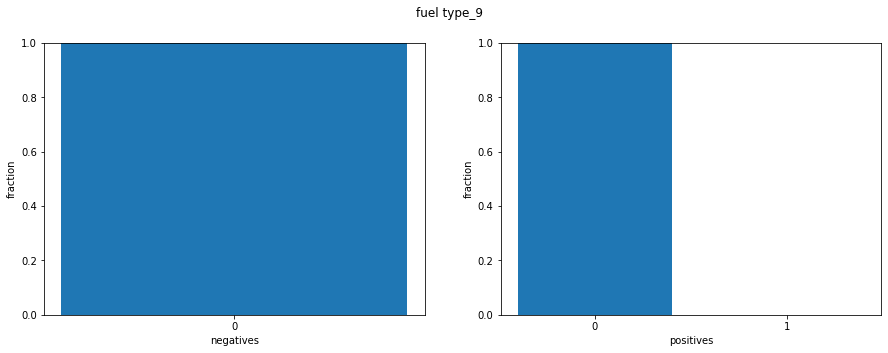

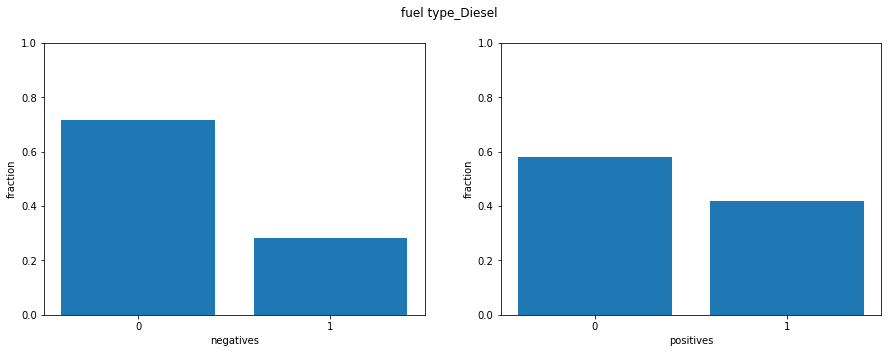

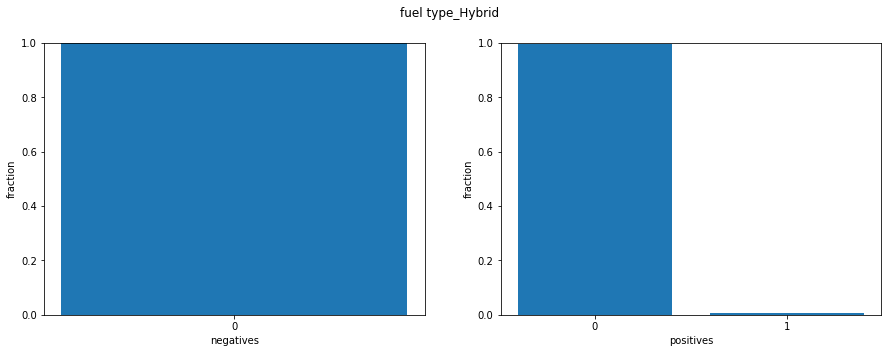

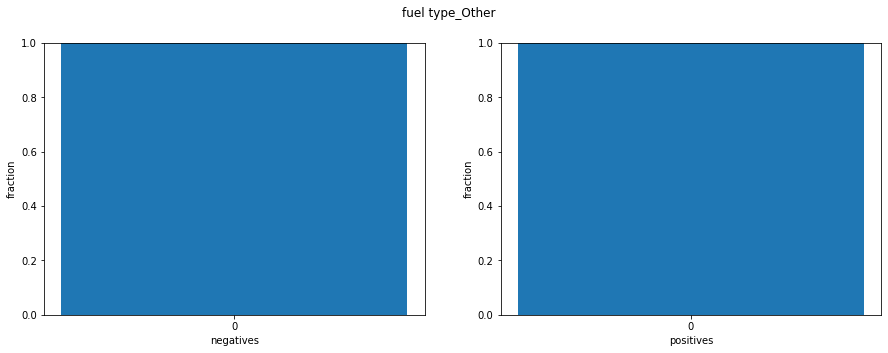

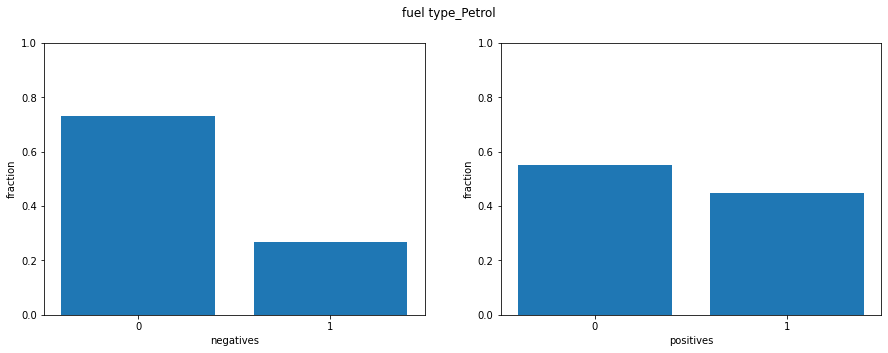

In [44]:
for i in np.array(cols)[idx][6:]:
    if negatives[i].nunique()<=2:
        plot_rel(i)